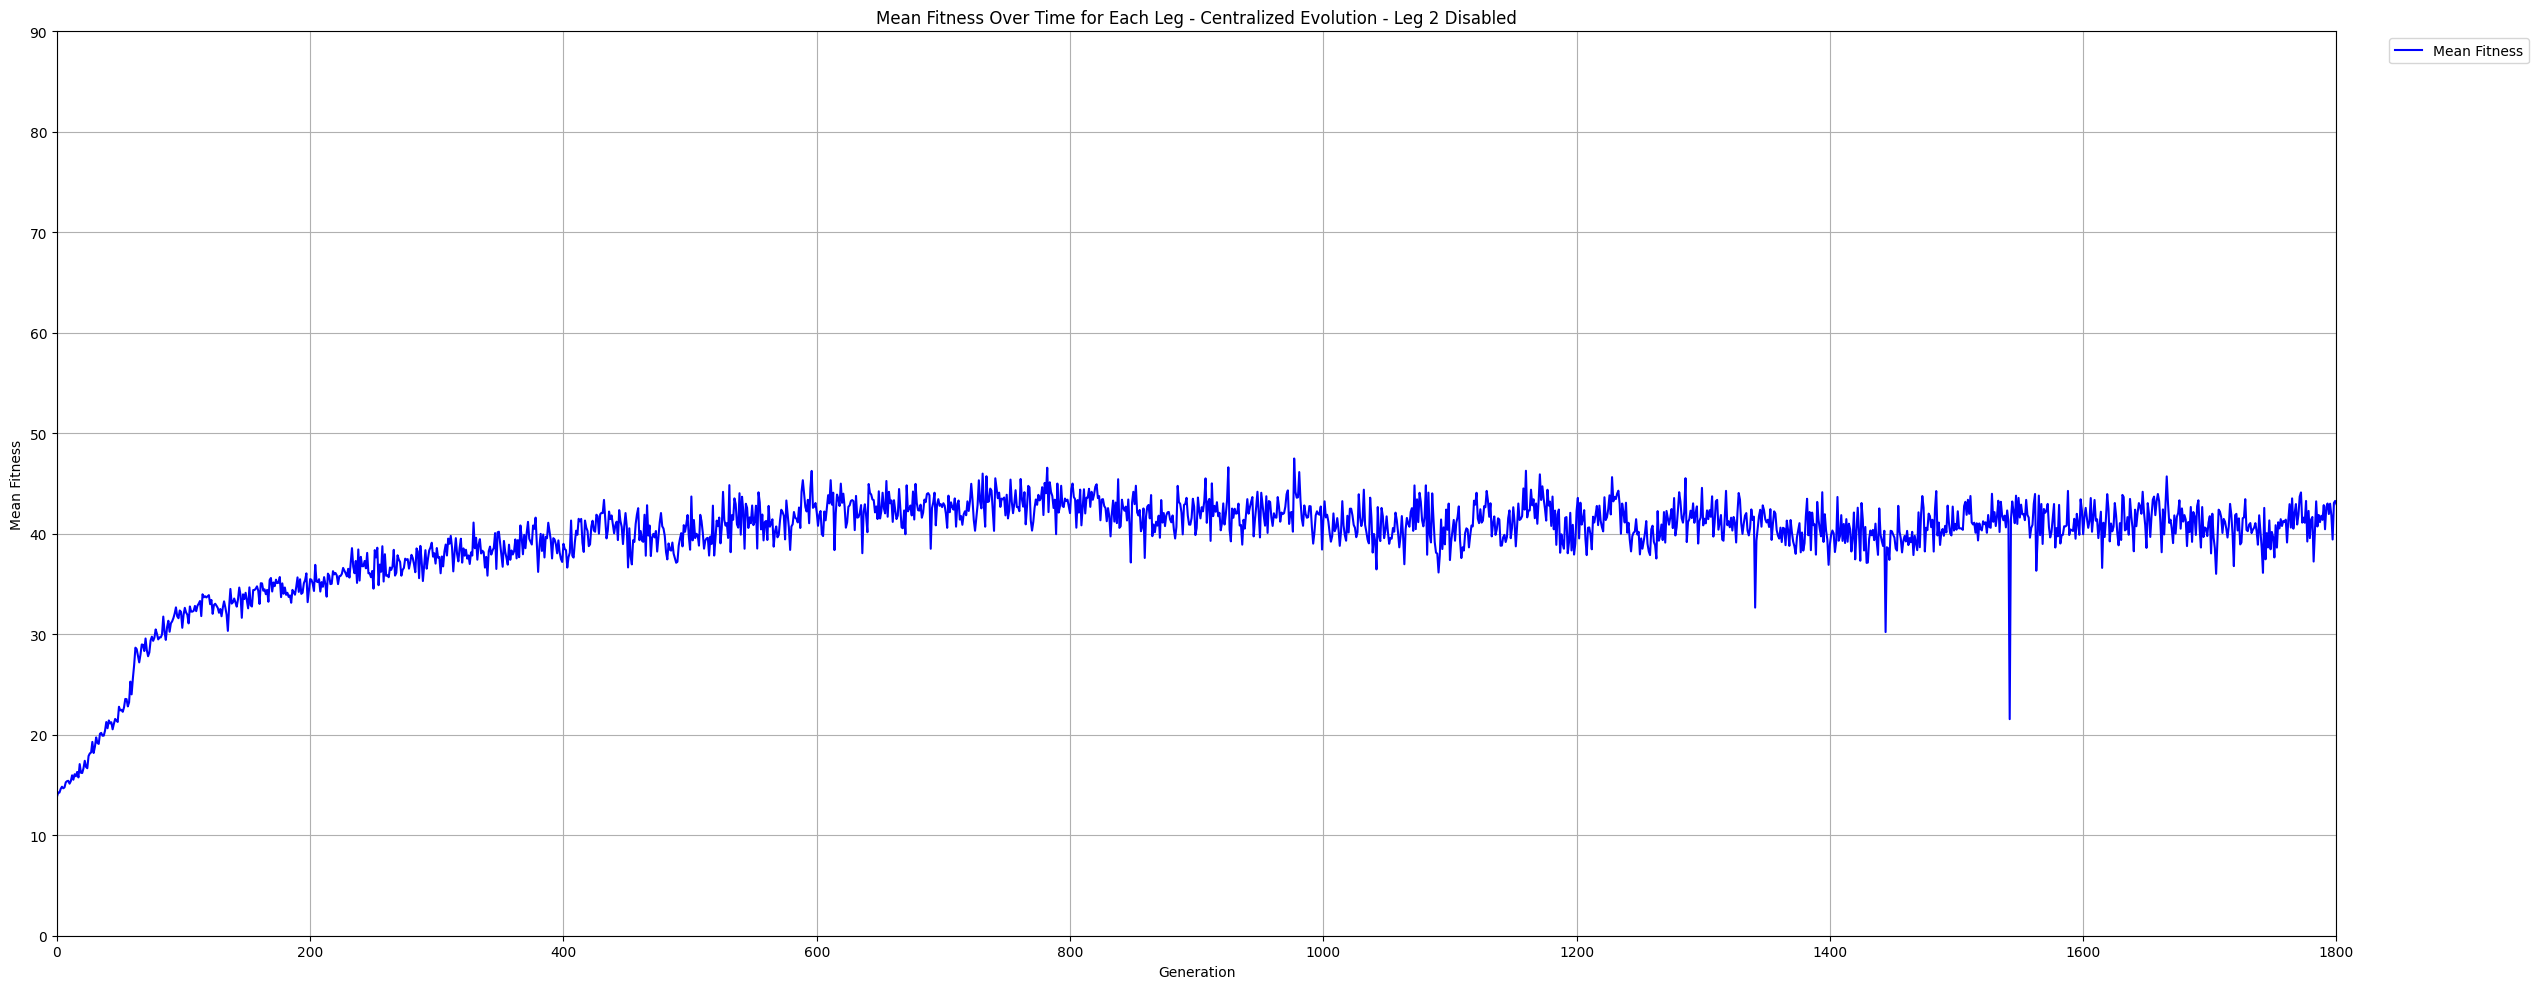

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'evolution_data.csv'
data = pd.read_csv(file_path)

# Extract relevant columns
generations = data['Generation']
fitness = data['Fitness']

# Filter data to include only generations up to 3000
data = data[data['Generation'] <= 3000]

# Calculate mean fitness for each generation
mean_fitness = data.groupby('Generation')['Fitness'].mean()

# Plot the data
plt.figure(figsize=(30, 10))
plt.plot(mean_fitness.index, mean_fitness.values, linestyle='-', color='b', label='Mean Fitness')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.title('Mean Fitness Over Time for Each Leg - Centralized Evolution - Leg 2 Disabled')
plt.grid(True)

# Set y/x-axis limits
plt.ylim(0, 90)
plt.xlim(0, 3000)

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

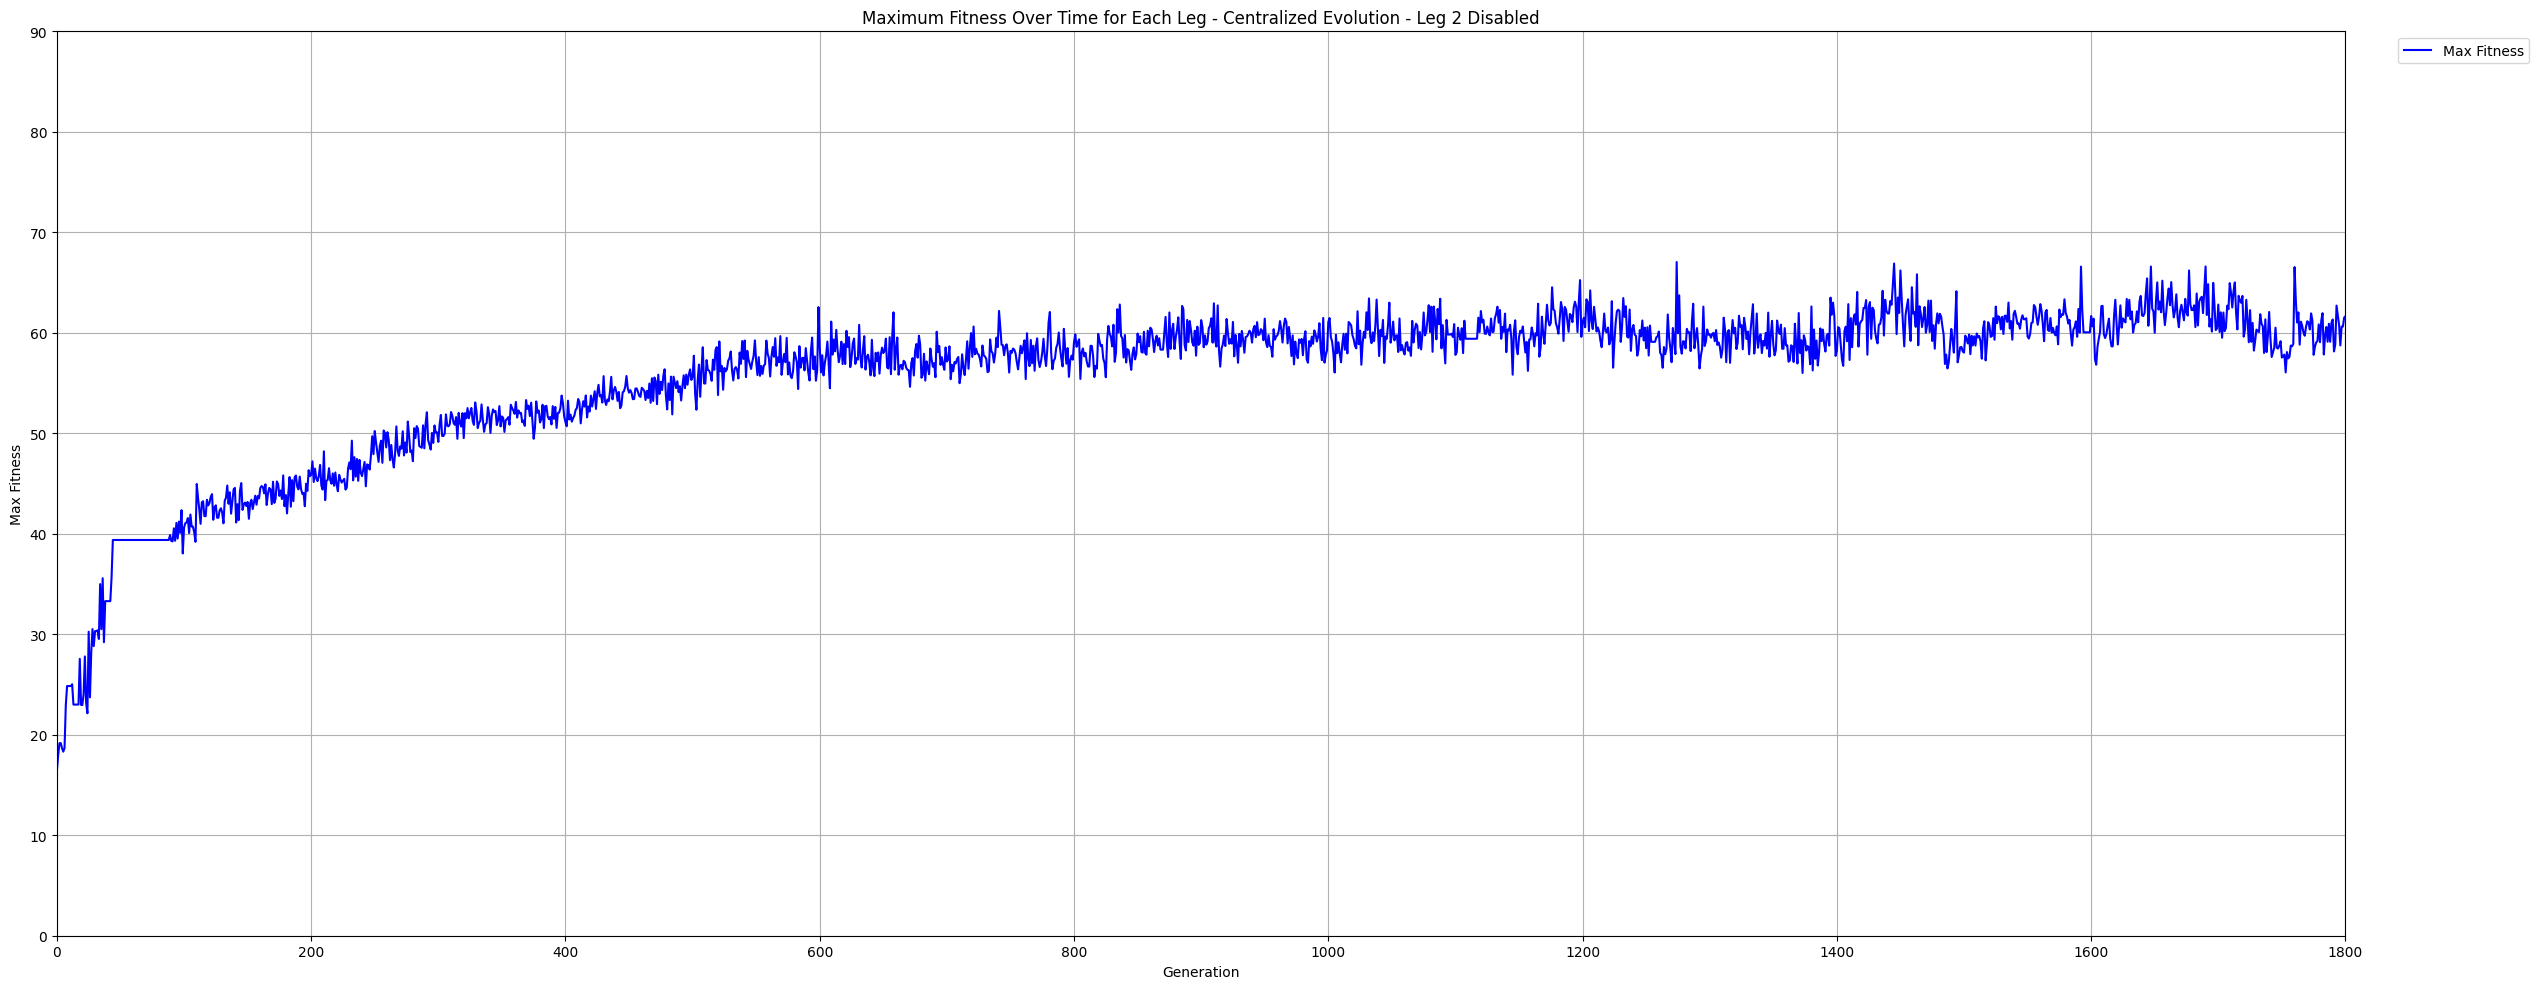

In [ ]:
# Extract relevant columns
generations = data['Generation']
fitness = data['Fitness']

# Calculate mean fitness for each generation
mean_fitness = data.groupby('Generation')['Fitness'].max()

# Plot the data
plt.figure(figsize=(30, 10))
plt.plot(mean_fitness.index, mean_fitness.values, linestyle='-', color='b', label='Max Fitness')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Max Fitness')
plt.title('Maximum Fitness Over Time for Each Leg - Centralized Evolution - Leg 2 Disabled')
plt.grid(True)

# Set y/x-axis limits
plt.ylim(0, 90)
plt.xlim(0, 3000)

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

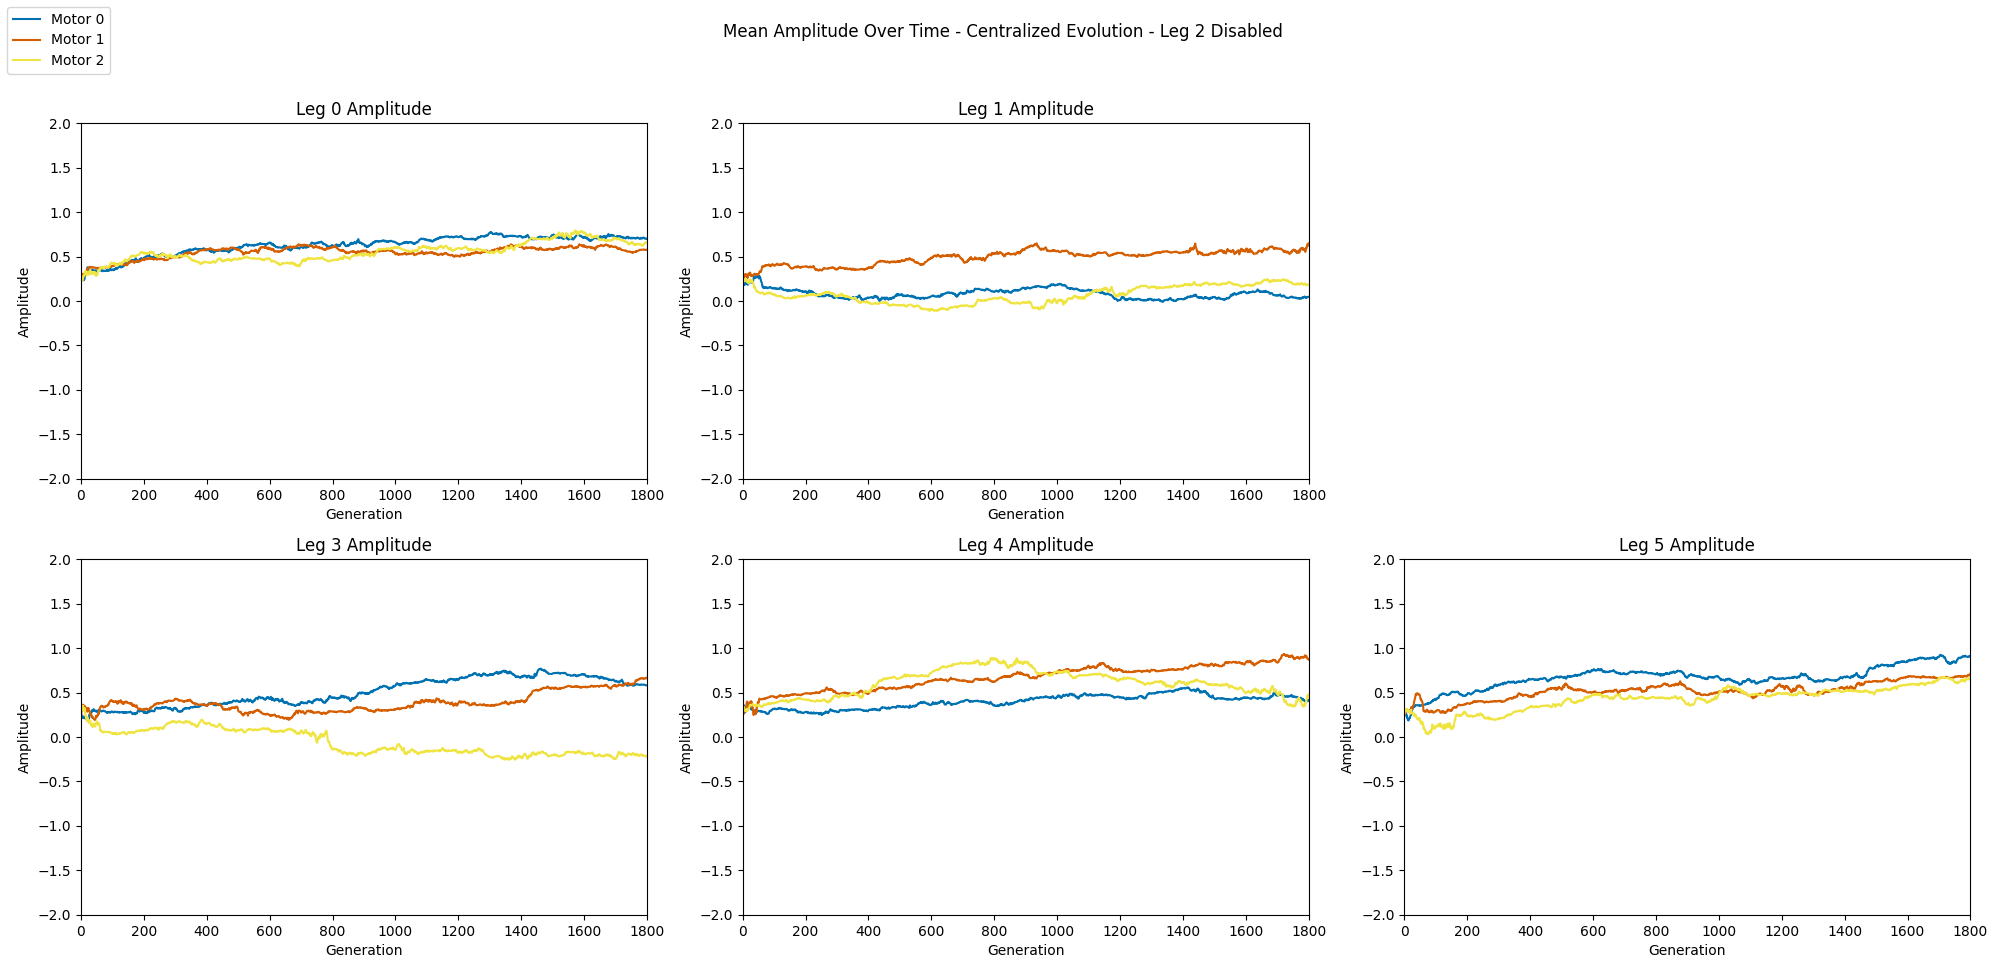

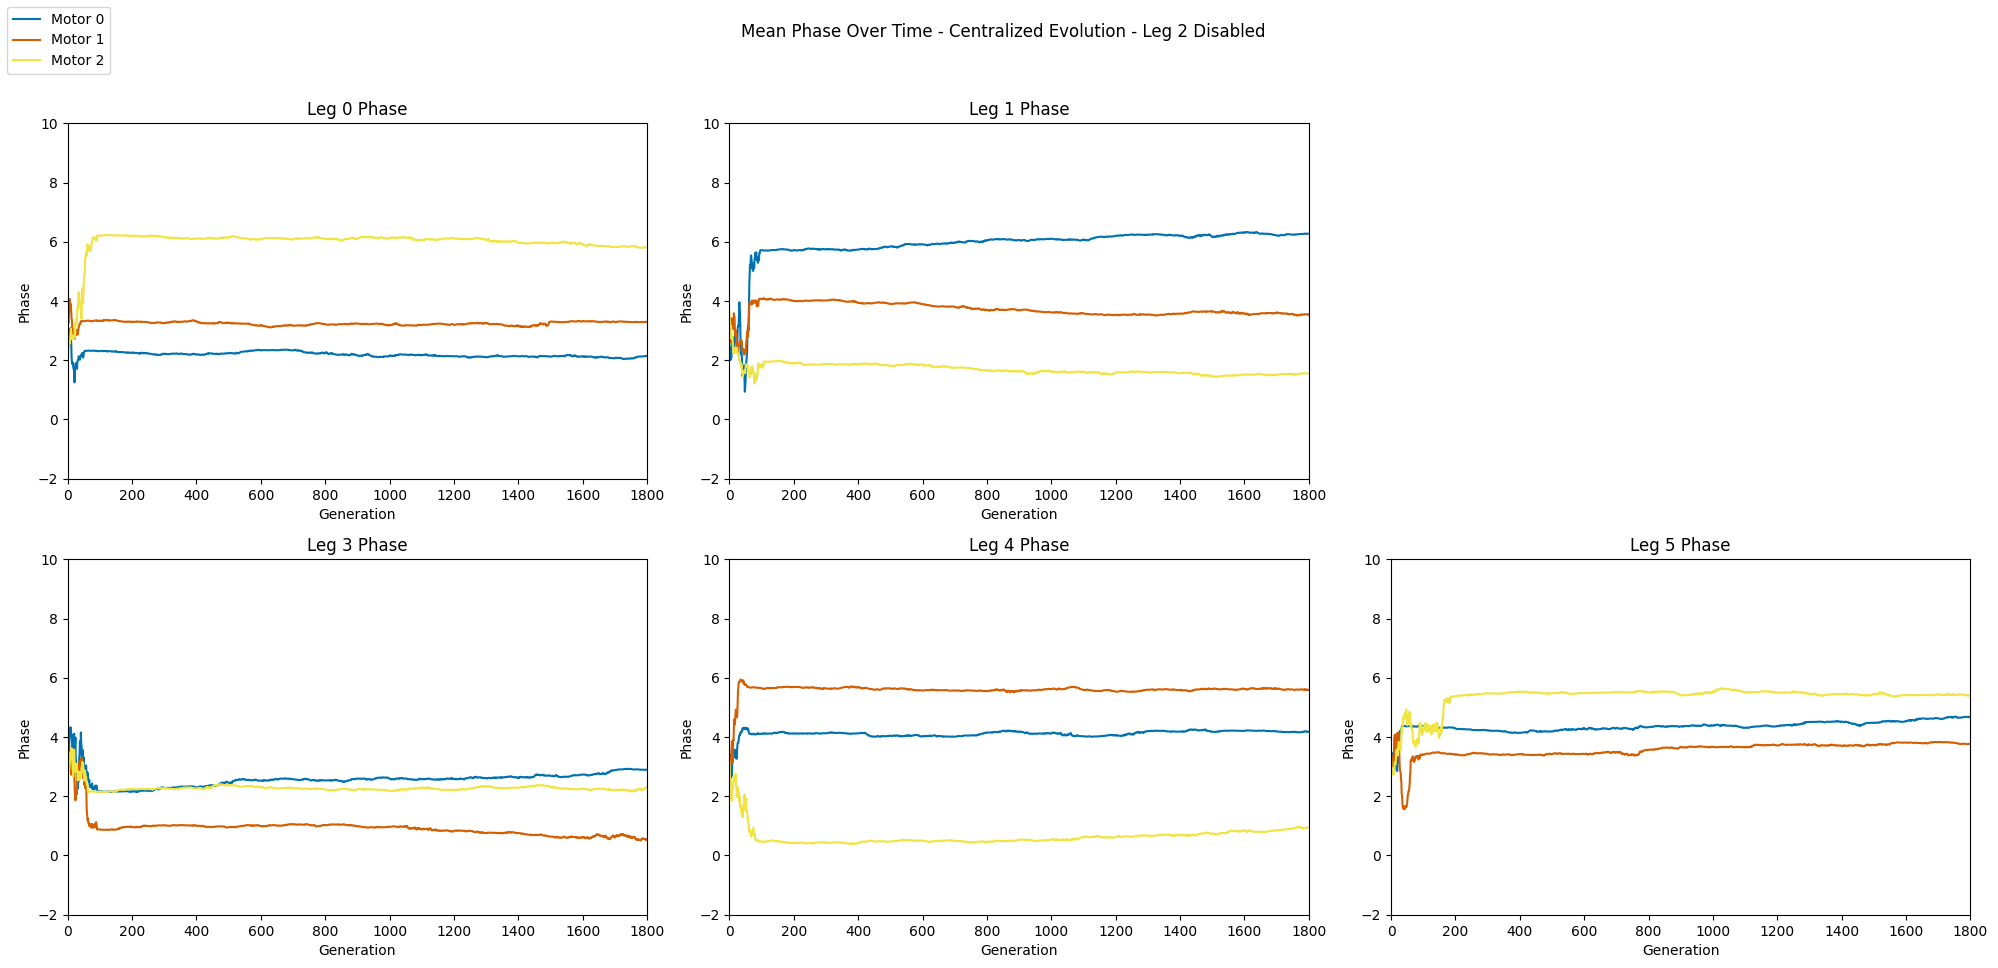

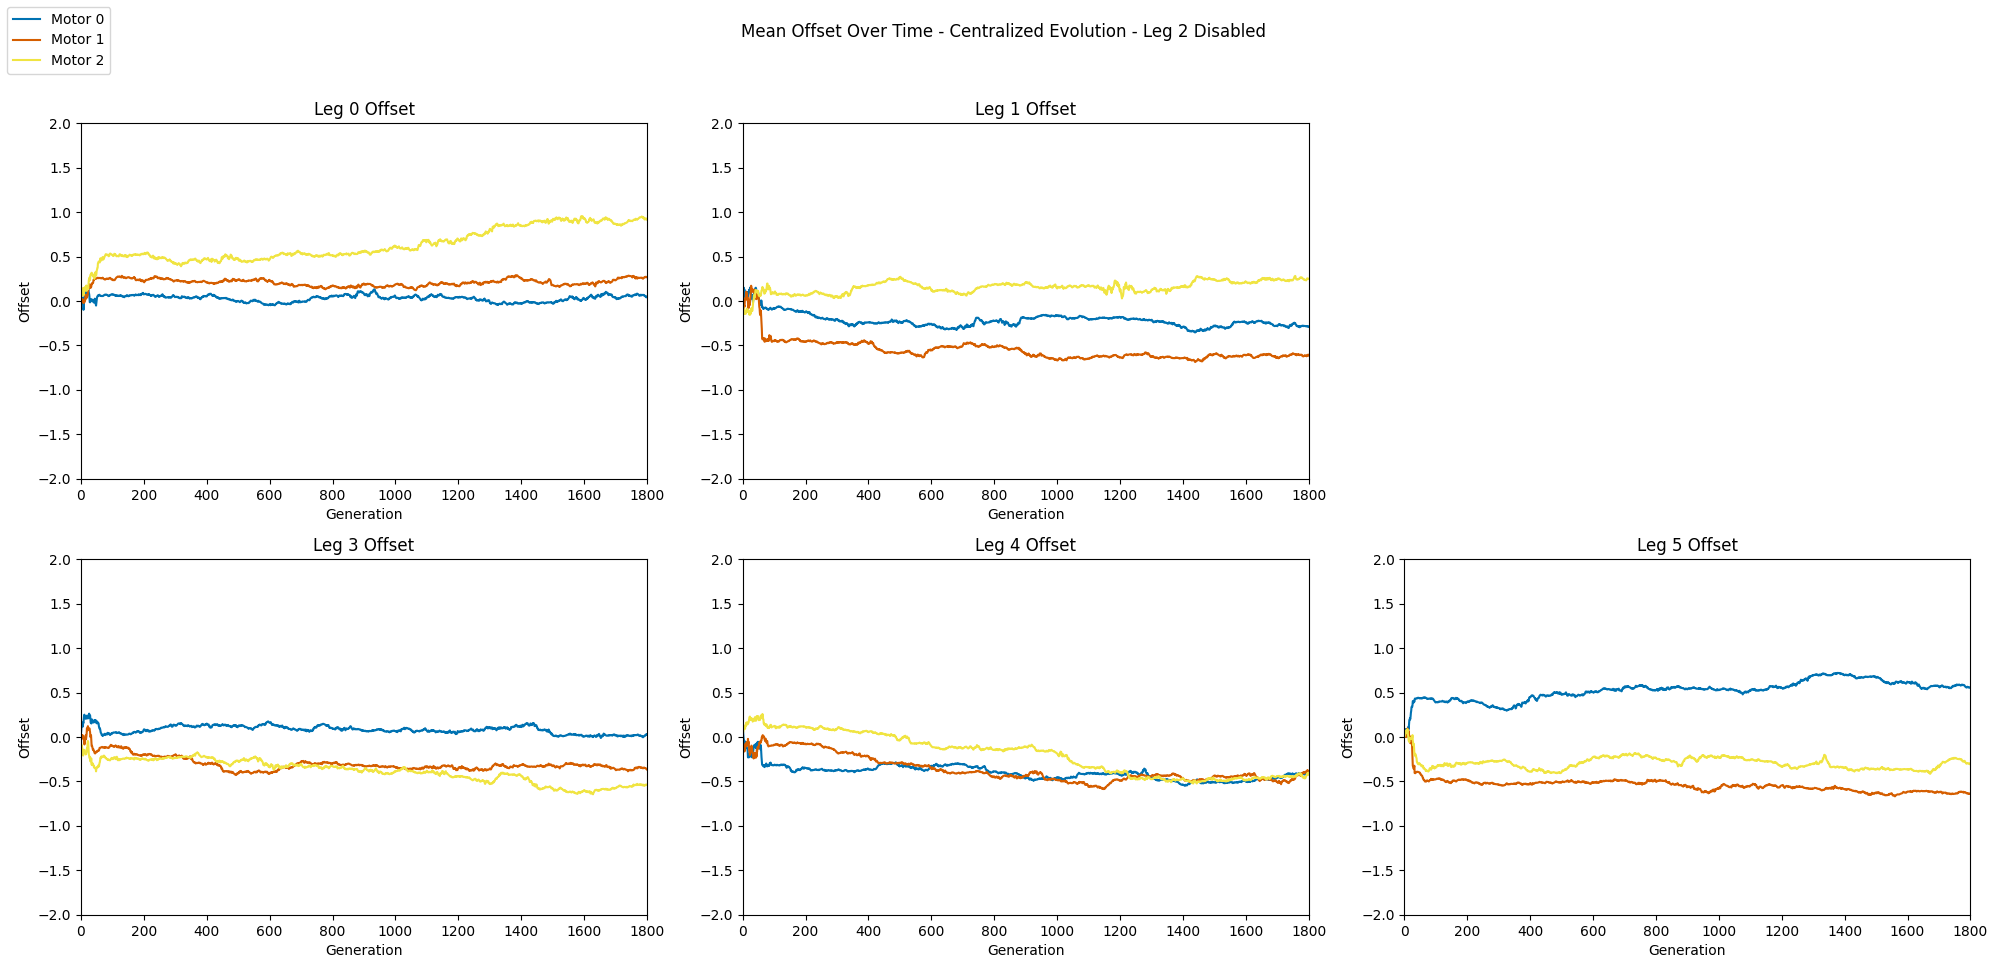

In [ ]:
import ast

# Convert string representations of lists to actual lists
data['Amplitude'] = data['Amplitude'].apply(ast.literal_eval)
data['Phase'] = data['Phase'].apply(ast.literal_eval)
data['Offset'] = data['Offset'].apply(ast.literal_eval)

color_map = {
    0: '#0072B2',  # Blue
    1: '#D55E00',  # Orange
    2: '#F0E442',  # Yellow
}

# Function to plot mean amplitude for all legs
def plot_amplitude(data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle('Mean Amplitude Over Time - Centralized Evolution - Leg 2 Disabled') 
    fig.delaxes(axs[0,2]) # Remove empty subplot

    lines_labels = [[], []]  # To store lines and labels for the legend

    for leg_index in range(6):
        row = leg_index // 3
        col = leg_index % 3

        # Initialize lists to store mean values
        mean_amplitude = {motor: [] for motor in range(3)}
        generations = sorted(data['Generation'].unique())

        # Calculate mean values for each generation
        for generation in generations:
            gen_data = data[data['Generation'] == generation]
            for motor in range(3):
                motor_index = leg_index * 3 + motor
                mean_amplitude[motor].append(gen_data['Amplitude'].apply(lambda x: x[motor_index]).mean())

        # Plot Amplitude
        for motor in range(3):
            color = color_map.get(motor, 'k')  # Default to black if motor not in color_map
            line, = axs[row, col].plot(generations, mean_amplitude[motor], label=f'Motor {motor}', color=color)
            if leg_index == 0:  # Collect lines and labels from the first row only
                lines_labels[0].append(line)
                lines_labels[1].append(f'Motor {motor}')
        axs[row, col].set_title(f'Leg {leg_index} Amplitude')
        axs[row, col].set_xlabel('Generation')
        axs[row, col].set_ylabel('Amplitude')
        axs[row, col].set_xlim([0, 3000])
        axs[row, col].set_ylim([-2, 2])  

    # Create a single legend for the entire figure
    fig.legend(lines_labels[0], lines_labels[1], loc='upper left', ncol=1)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Function to plot mean phase for all legs
def plot_phase(data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle('Mean Phase Over Time - Centralized Evolution - Leg 2 Disabled') 
    fig.delaxes(axs[0,2]) # Remove empty subplot

    lines_labels = [[], []]  # To store lines and labels for the legend

    for leg_index in range(6):
        row = leg_index // 3
        col = leg_index % 3

        # Initialize lists to store mean values
        mean_phase = {motor: [] for motor in range(3)}
        generations = sorted(data['Generation'].unique())

        # Calculate mean values for each generation
        for generation in generations:
            gen_data = data[data['Generation'] == generation]
            for motor in range(3):
                motor_index = leg_index * 3 + motor
                mean_phase[motor].append(gen_data['Phase'].apply(lambda x: x[motor_index]).mean())

        # Plot Phase
        for motor in range(3):
            color = color_map.get(motor, 'k')  # Default to black if motor not in color_map
            line, = axs[row, col].plot(generations, mean_phase[motor], label=f'Motor {motor}', color=color)
            if leg_index == 0:  # Collect lines and labels from the first row only
                lines_labels[0].append(line)
                lines_labels[1].append(f'Motor {motor}')
        axs[row, col].set_title(f'Leg {leg_index} Phase')
        axs[row, col].set_xlabel('Generation')
        axs[row, col].set_ylabel('Phase')
        axs[row, col].set_xlim([0, 3000])
        axs[row, col].set_ylim([-2, 10])  

    # Create a single legend for the entire figure
    fig.legend(lines_labels[0], lines_labels[1], loc='upper left', ncol=1)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Function to plot mean offset for all legs
def plot_offset(data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle('Mean Offset Over Time - Centralized Evolution - Leg 2 Disabled') 
    fig.delaxes(axs[0,2]) # Remove empty subplot

    lines_labels = [[], []]  # To store lines and labels for the legend

    for leg_index in range(6):
        row = leg_index // 3
        col = leg_index % 3

        # Initialize lists to store mean values
        mean_offset = {motor: [] for motor in range(3)}
        generations = sorted(data['Generation'].unique())

        # Calculate mean values for each generation
        for generation in generations:
            gen_data = data[data['Generation'] == generation]
            for motor in range(3):
                motor_index = leg_index * 3 + motor
                mean_offset[motor].append(gen_data['Offset'].apply(lambda x: x[motor_index]).mean())

        # Plot Offset
        for motor in range(3):
            color = color_map.get(motor, 'k')  # Default to black if motor not in color_map
            line, = axs[row, col].plot(generations, mean_offset[motor], label=f'Motor {motor}', color=color)
            if leg_index == 0:  # Collect lines and labels from the first row only
                lines_labels[0].append(line)
                lines_labels[1].append(f'Motor {motor}')
        axs[row, col].set_title(f'Leg {leg_index} Offset')
        axs[row, col].set_xlabel('Generation')
        axs[row, col].set_ylabel('Offset')
        axs[row, col].set_xlim([0, 3000])
        axs[row, col].set_ylim([-2, 2])  

    # Create a single legend for the entire figure
    fig.legend(lines_labels[0], lines_labels[1], loc='upper left', ncol=1)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot data for all legs
plot_amplitude(data)
plot_phase(data)
plot_offset(data)